# Evaluation

In [182]:
import pandas as pd
import numpy as np
from scipy import stats

In [183]:
queries_indexes_df = pd.read_pickle("./queries_indexes_df.pkl")

In [184]:
queries_indexes_df

,Query ID,Song ID,pitch_diff-ngram_5_set_index,UpSameDown-ngram_5_set_index,pitch_diff-ngram_8_set_index,UpSameDown-ngram_8_set_index,pitch_diff-ngram_10_set_index,UpSameDown-ngram_10_set_index,pitch_diff-ngram_12_set_index,UpSameDown-ngram_12_set_index,...,UpSameDown-ngram_12_set_hll_12_index,UpSameDown-ngram_12_set_hll_16_index,pitch_diff-multi_gram_5_10_set_hll_4_index,pitch_diff-multi_gram_5_10_set_hll_8_index,pitch_diff-multi_gram_5_10_set_hll_12_index,pitch_diff-multi_gram_5_10_set_hll_16_index,UpSameDown-multi_gram_5_10_set_hll_4_index,UpSameDown-multi_gram_5_10_set_hll_8_index,UpSameDown-multi_gram_5_10_set_hll_12_index,UpSameDown-multi_gram_5_10_set_hll_16_index
0,q1,1118,401,425,398,406,398,398,398,398,...,165,127,440,266,211,140,116,151,342,451
1,q2,1438,14,143,59,102,59,178,59,113,...,433,390,26,332,290,391,400,166,133,100
2,q3,1546,58,9,7,37,6,196,6,30,...,469,62,25,271,447,14,87,8,17,10
3,q4,1579,16,56,47,76,46,119,46,92,...,308,113,183,417,333,270,397,17,63,63
4,q5,1808,1,159,181,209,181,246,181,206,...,331,300,153,101,38,1,416,100,143,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,q114,479,1,69,284,19,284,45,284,258,...,8,411,23,77,39,6,144,77,16,29
114,q115,1747,239,93,205,61,205,178,205,251,...,205,433,181,198,52,139,148,270,108,67
115,q116,2024,228,453,236,326,236,185,236,245,...,308,105,195,250,328,382,90,424,445,444
116,q117,281,337,329,334,396,334,334,334,334,...,334,334,338,384,433,167,443,470,432,453


In [173]:
# non_vocals_song_ids = [1081,126,1212, 1536, 1655, 995,1786]

In [185]:
# queries_indexes_df[~queries_indexes_df['Song ID'].isin(non_vocals_song_ids)]

In [186]:
# load results from each experiment
# split queries in 10 sets
# calculate MRR for each set
# apply statistical tests t-test or Mann-Whitney 

# check memory usage in hll and sets representations
# apply statistical tests t-test or Mann-Whitney for memory usage

In [187]:
shuffled = queries_indexes_df.sample(frac=1, random_state=2345)
splits = np.array_split(shuffled, 10)  

In [188]:
def inverse(num):
    return 1.0/num

def get_mrr(rank_list):
    result = {}
    ranks = rank_list[np.logical_not(np.isnan(rank_list))]
    inverted_ranks = inverse(ranks)
    result["mrr"] = inverted_ranks.mean()
    result["count"] = len(inverted_ranks)
    return result


In [189]:
cols_indexes = list(queries_indexes_df.columns)
cols_indexes.remove('Song ID')
cols_indexes.remove('Query ID')

In [190]:
results = []
for index, split in enumerate(splits):
    for col_index in cols_indexes:
        mrr = get_mrr(split[col_index])
        results.append({"split":index,"col_index":col_index,"mrr":mrr['mrr']})
results_df = pd.DataFrame.from_records(results)

In [191]:
results_df

,split,col_index,mrr
0,0,pitch_diff-ngram_5_set_index,0.147602
1,0,UpSameDown-ngram_5_set_index,0.006040
2,0,pitch_diff-ngram_8_set_index,0.011664
3,0,UpSameDown-ngram_8_set_index,0.008147
4,0,pitch_diff-ngram_10_set_index,0.011679
...,...,...,...
495,9,pitch_diff-multi_gram_5_10_set_hll_16_index,0.039081
496,9,UpSameDown-multi_gram_5_10_set_hll_4_index,0.035757
497,9,UpSameDown-multi_gram_5_10_set_hll_8_index,0.018091
498,9,UpSameDown-multi_gram_5_10_set_hll_12_index,0.022626


In [192]:
def get_set_type(s):
    return s.split("_set_")[0]+""
results_df['set_type'] = results_df['col_index'].apply(get_set_type)

In [193]:
def get_similarity_methods_from_index(s:str):
    if("set_index" in s):
        return 'baseline'
    return s.split('_set_')[1].replace("_index","")

results_df['similarity_method'] = results_df['col_index'].apply(get_similarity_methods_from_index)

In [194]:
results_df.head()

,split,col_index,mrr,set_type,similarity_method
0,0,pitch_diff-ngram_5_set_index,0.147602,pitch_diff-ngram_5,baseline
1,0,UpSameDown-ngram_5_set_index,0.006040,UpSameDown-ngram_5,baseline
2,0,pitch_diff-ngram_8_set_index,0.011664,pitch_diff-ngram_8,baseline
3,0,UpSameDown-ngram_8_set_index,0.008147,UpSameDown-ngram_8,baseline
4,0,pitch_diff-ngram_10_set_index,0.011679,pitch_diff-ngram_10,baseline


In [195]:
results_df.pivot(columns='set_type', index=["split","similarity_method"], values='mrr')

set_type                 UpSameDown-multi_gram_5_10  UpSameDown-ngram_10  \
split similarity_method                                                    
0     baseline                             0.009842             0.011209   
      hll_12                               0.007189             0.018519   
      hll_16                               0.008910             0.009024   
      hll_4                                0.007649             0.005633   
      hll_8                                0.010875             0.014449   
1     baseline                             0.013460             0.015936   
      hll_12                               0.013324             0.013522   
      hll_16                               0.013406             0.018475   
      hll_4                                0.034925             0.016625   
      hll_8                                0.022372             0.011613   
2     baseline                             0.003624             0.006081   
      hll_12                               0.003627             0.005584   
      hll_16                               0.003569             0.005464   
      hll_4                                0.013480             0.008764   
      hll_8                                0.004219             0.006926   
3     baseline                             0.041437             0.048677   
      hll_12                               0.038245             0.038646   
      hll_16                               0.041838             0.060783   
      hll_4                                0.010956             0.008847   
      hll_8                                0.035486             0.013471   
4     baseline                             0.099379             0.097981   
      hll_12                               0.101328             0.050185   
      hll_16                               0.099960             0.096200   
      hll_4                                0.015788             0.014616   
      hll_8                                0.030105             0.010408   
5     baseline                             0.011958             0.009807   
      hll_12                               0.017462             0.009085   
      hll_16                               0.012763             0.011849   
      hll_4                                0.025855             0.011501   
      hll_8                                0.007411             0.009707   
6     baseline                             0.010115             0.006684   
      hll_12                               0.011703             0.009931   
      hll_16                               0.010569             0.007748   
      hll_4                                0.006272             0.008241   
      hll_8                                0.004535             0.021471   
7     baseline                             0.007607             0.009506   
      hll_12                               0.007299             0.009687   
      hll_16                               0.007703             0.011051   
      hll_4                                0.007172             0.012164   
      hll_8                                0.014664             0.010228   
8     baseline                             0.051524             0.019917   
      hll_12                               0.033567             0.017180   
      hll_16                               0.053159             0.016909   
      hll_4                                0.006196             0.006805   
      hll_8                                0.015751             0.006302   
9     baseline                             0.030600             0.022304   
      hll_12                               0.022626             0.019727   
      hll_16                               0.024262             0.019509   
      hll_4                                0.035757             0.011842   
      hll_8                                0.018091             0.016481   

set_type                 UpSameDown-ngram_12  U

In [196]:
results_t_test = []
for g in list(results_df['set_type'].unique()):
    g_df = results_df[results_df["set_type"] == g]
    baseline_key = g+"_set_index"
    baseline_mmr = g_df[g_df['col_index']==baseline_key]['mrr'].tolist()
    for col_index in list(g_df['col_index'].unique()):
        if(col_index != baseline_key):
            col_index_mmr = g_df[g_df['col_index']==col_index]['mrr'].tolist()
            res = stats.ttest_rel(np.array(baseline_mmr),col_index_mmr, alternative='greater')
            mean_mrr = np.mean(col_index_mmr)
            mean_baseline_mrr = np.mean(baseline_mmr)
            results_t_test.append({'p_value':res.pvalue,
                                    'set_type':g,
                                   'similarity_method': get_similarity_methods_from_index(col_index),
                                   'col_index':col_index,
                                   'mean_mrr':mean_mrr,
                                   'mean_baseline_mrr':mean_baseline_mrr})
results_t_test_df = pd.DataFrame.from_records(results_t_test)
results_t_test_df['reject_nh'] = results_t_test_df['p_value']<=0.05
results_t_test_df

,p_value,set_type,similarity_method,col_index,mean_mrr,mean_baseline_mrr,reject_nh
0,0.000026,pitch_diff-ngram_5,hll_4,pitch_diff-ngram_5_set_hll_4_index,0.022292,0.147636,True
1,0.000005,pitch_diff-ngram_5,hll_8,pitch_diff-ngram_5_set_hll_8_index,0.011304,0.147636,True
2,0.001039,pitch_diff-ngram_5,hll_12,pitch_diff-ngram_5_set_hll_12_index,0.064208,0.147636,True
3,0.263922,pitch_diff-ngram_5,hll_16,pitch_diff-ngram_5_set_hll_16_index,0.142353,0.147636,False
4,0.332402,UpSameDown-ngram_5,hll_4,UpSameDown-ngram_5_set_hll_4_index,0.012909,0.013816,False
5,0.893786,UpSameDown-ngram_5,hll_8,UpSameDown-ngram_5_set_hll_8_index,0.022210,0.013816,False
6,0.948360,UpSameDown-ngram_5,hll_12,UpSameDown-ngram_5_set_hll_12_index,0.020694,0.013816,False
7,0.987532,UpSameDown-ngram_5,hll_16,UpSameDown-ngram_5_set_hll_16_index,0.017216,0.013816,False
8,0.042560,pitch_diff-ngram_8,hll_4,pitch_diff-ngram_8_set_hll_4_index,0.014646,0.037427,True
9,0.032360,pitch_diff-ngram_8,hll_8,pitch_diff-ngram_8_set_hll_8_index,0.013557,0.037427,True


In [197]:
df = results_df.groupby(["similarity_method","set_type"])["mrr"].mean().to_frame().reset_index().sort_values(by=["similarity_method","set_type"])

<Axes: xlabel='mrr', ylabel='set_type'>

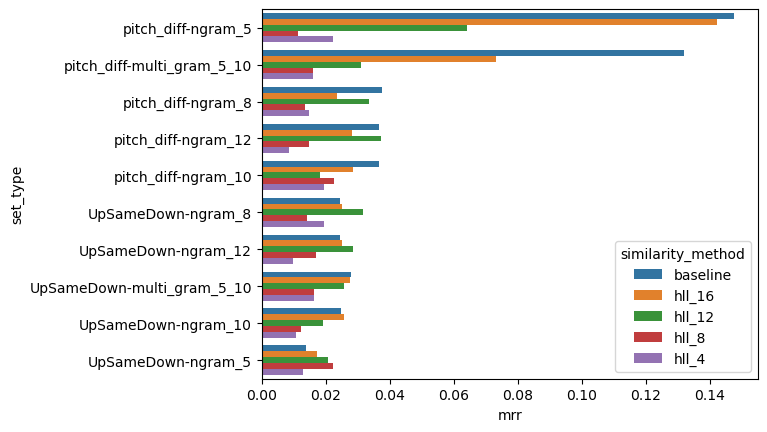

In [198]:
import seaborn as sns
sns.barplot(data=df.sort_values(by=["mrr","similarity_method"], ascending=False), y='set_type', x='mrr', hue='similarity_method')